In [2]:
import numpy as np

# 定义角度po (α')的函数
po = lambda ap, bp: np.arctan(np.cos((bp - 90) * np.pi / 180) * np.tan(ap * np.pi / 180)) * 180 / np.pi

# 定义函数W来计算覆盖宽度
W = lambda D, x, po_value: (D - x * np.tan(po_value * np.pi / 180)) * (
    np.sin((theta / 2) * np.pi / 180) / np.sin((90 - po_value - theta / 2) * np.pi / 180) + 
    np.sin((theta / 2) * np.pi / 180) / np.sin((90 + po_value - theta / 2) * np.pi / 180)
) * np.cos(po_value * np.pi / 180)

# 定义函数YT
YT = lambda d, po_value: d * (np.sin((90 + theta / 2) * np.pi / 180) / np.sin((90 - theta / 2 - po_value) * np.pi / 180)) * np.cos(po_value * np.pi / 180)

# 其他给定的参数
alpha = 1.5
D_center = 110
theta = 120

# 计算给定重叠率的测线数
def calculate_lines_for_given_overlap(overlap):
    x = [0]
    iteration_count = 0
    while x[-1] < 2 * 1852 and iteration_count < 1000:
        di = np.arange(0, 1000, 0.3)
        new_x = x[-1] + di[np.argmin(np.abs((W(D_center, di + x[-1], alpha) - YT(di, alpha)) / W(D_center, di + x[-1], alpha) - overlap))]
        if np.abs(new_x - x[-1]) < 1:
            break
        x.append(new_x)
        iteration_count += 1

    iteration_count = 0
    while x[0] > -2 * 1852 and iteration_count < 1000:
        di = np.arange(0, -1000, -1)
        new_x = x[0] + di[np.argmin(np.abs((W(D_center, di + x[0], alpha) - YT(-di, alpha)) / W(D_center, di + x[0], alpha) - overlap))]
        if np.abs(new_x - x[0]) < 1:
            break
        x = [new_x] + x
        iteration_count += 1
        
    x = np.round(x, 2)
    return len(x) - 1

# 计算给定重叠率的总长度
def calculate_total_length_for_given_overlap(overlap):
    num_lines = calculate_lines_for_given_overlap(overlap)
    total_length = num_lines * 2 * 1852  # 2海里转换为米
    return num_lines, total_length

# 对每个重叠率进行计算
results_with_length = [(overlap, *calculate_total_length_for_given_overlap(overlap)) for overlap in np.arange(0.1, 0.21, 0.02)]
results_with_length

[(0.1, 37, 137048),
 (0.12000000000000001, 38, 140752),
 (0.14, 39, 144456),
 (0.16000000000000003, 40, 148160),
 (0.18000000000000002, 41, 151864),
 (0.2, 41, 151864)]

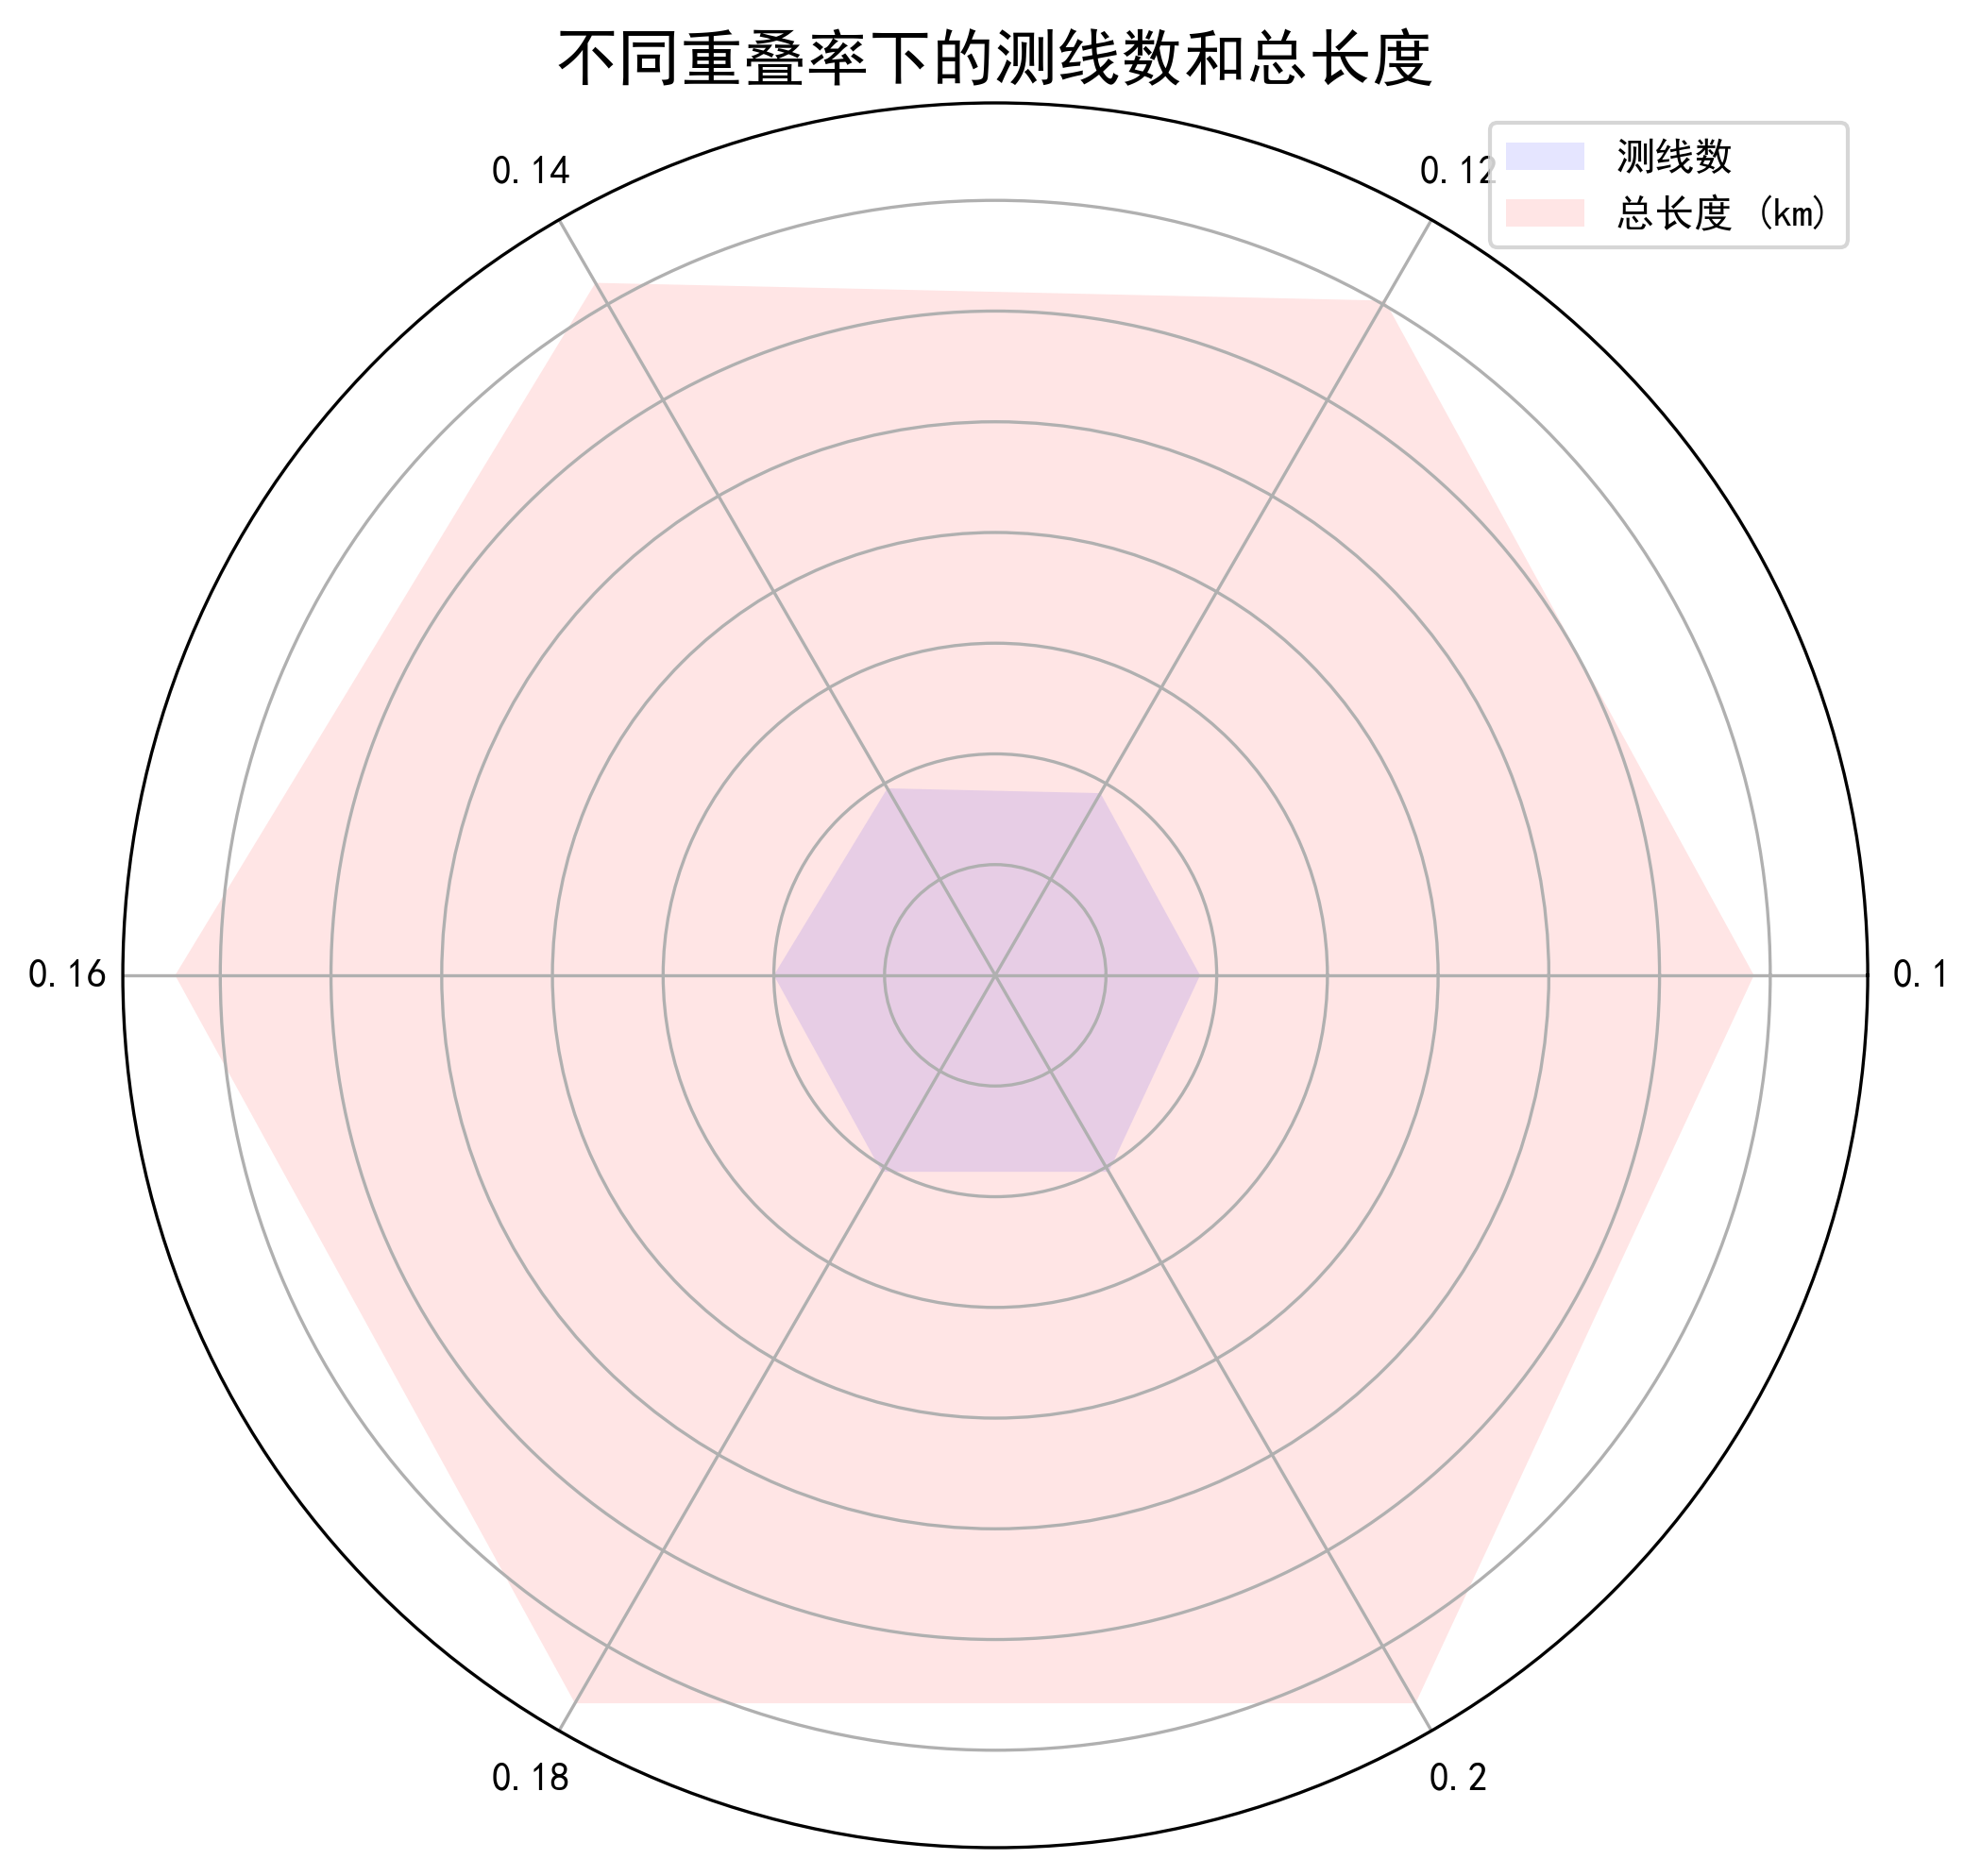

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 将结果数据拆分为不同列表
overlaps, num_lines, total_lengths = zip(*results_with_length)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 或其他已安装的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
# 创建一个极坐标图
plt.figure(figsize=(8, 8),dpi=300)
ax = plt.subplot(111, polar=True)

# 设置角度和数值
angles = np.linspace(0, 2 * np.pi, len(overlaps), endpoint=False)
values1 = np.array(num_lines)
values2 = np.array(total_lengths) / 1000  # 将总长度转换为千米

# 使雷达图封闭
values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))
angles = np.concatenate((angles, [angles[0]]))

# 绘制雷达图
ax.fill(angles, values1, 'b', alpha=0.1, label='测线数')
ax.fill(angles, values2, 'r', alpha=0.1, label='总长度 (km)')

# 添加网格线
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(['0.1', '0.12', '0.14', '0.16', '0.18', '0.2'])
ax.set_title("不同重叠率下的测线数和总长度", fontsize=16)

# 显示图例
plt.legend(loc="upper right")

# 显示图形
plt.show()


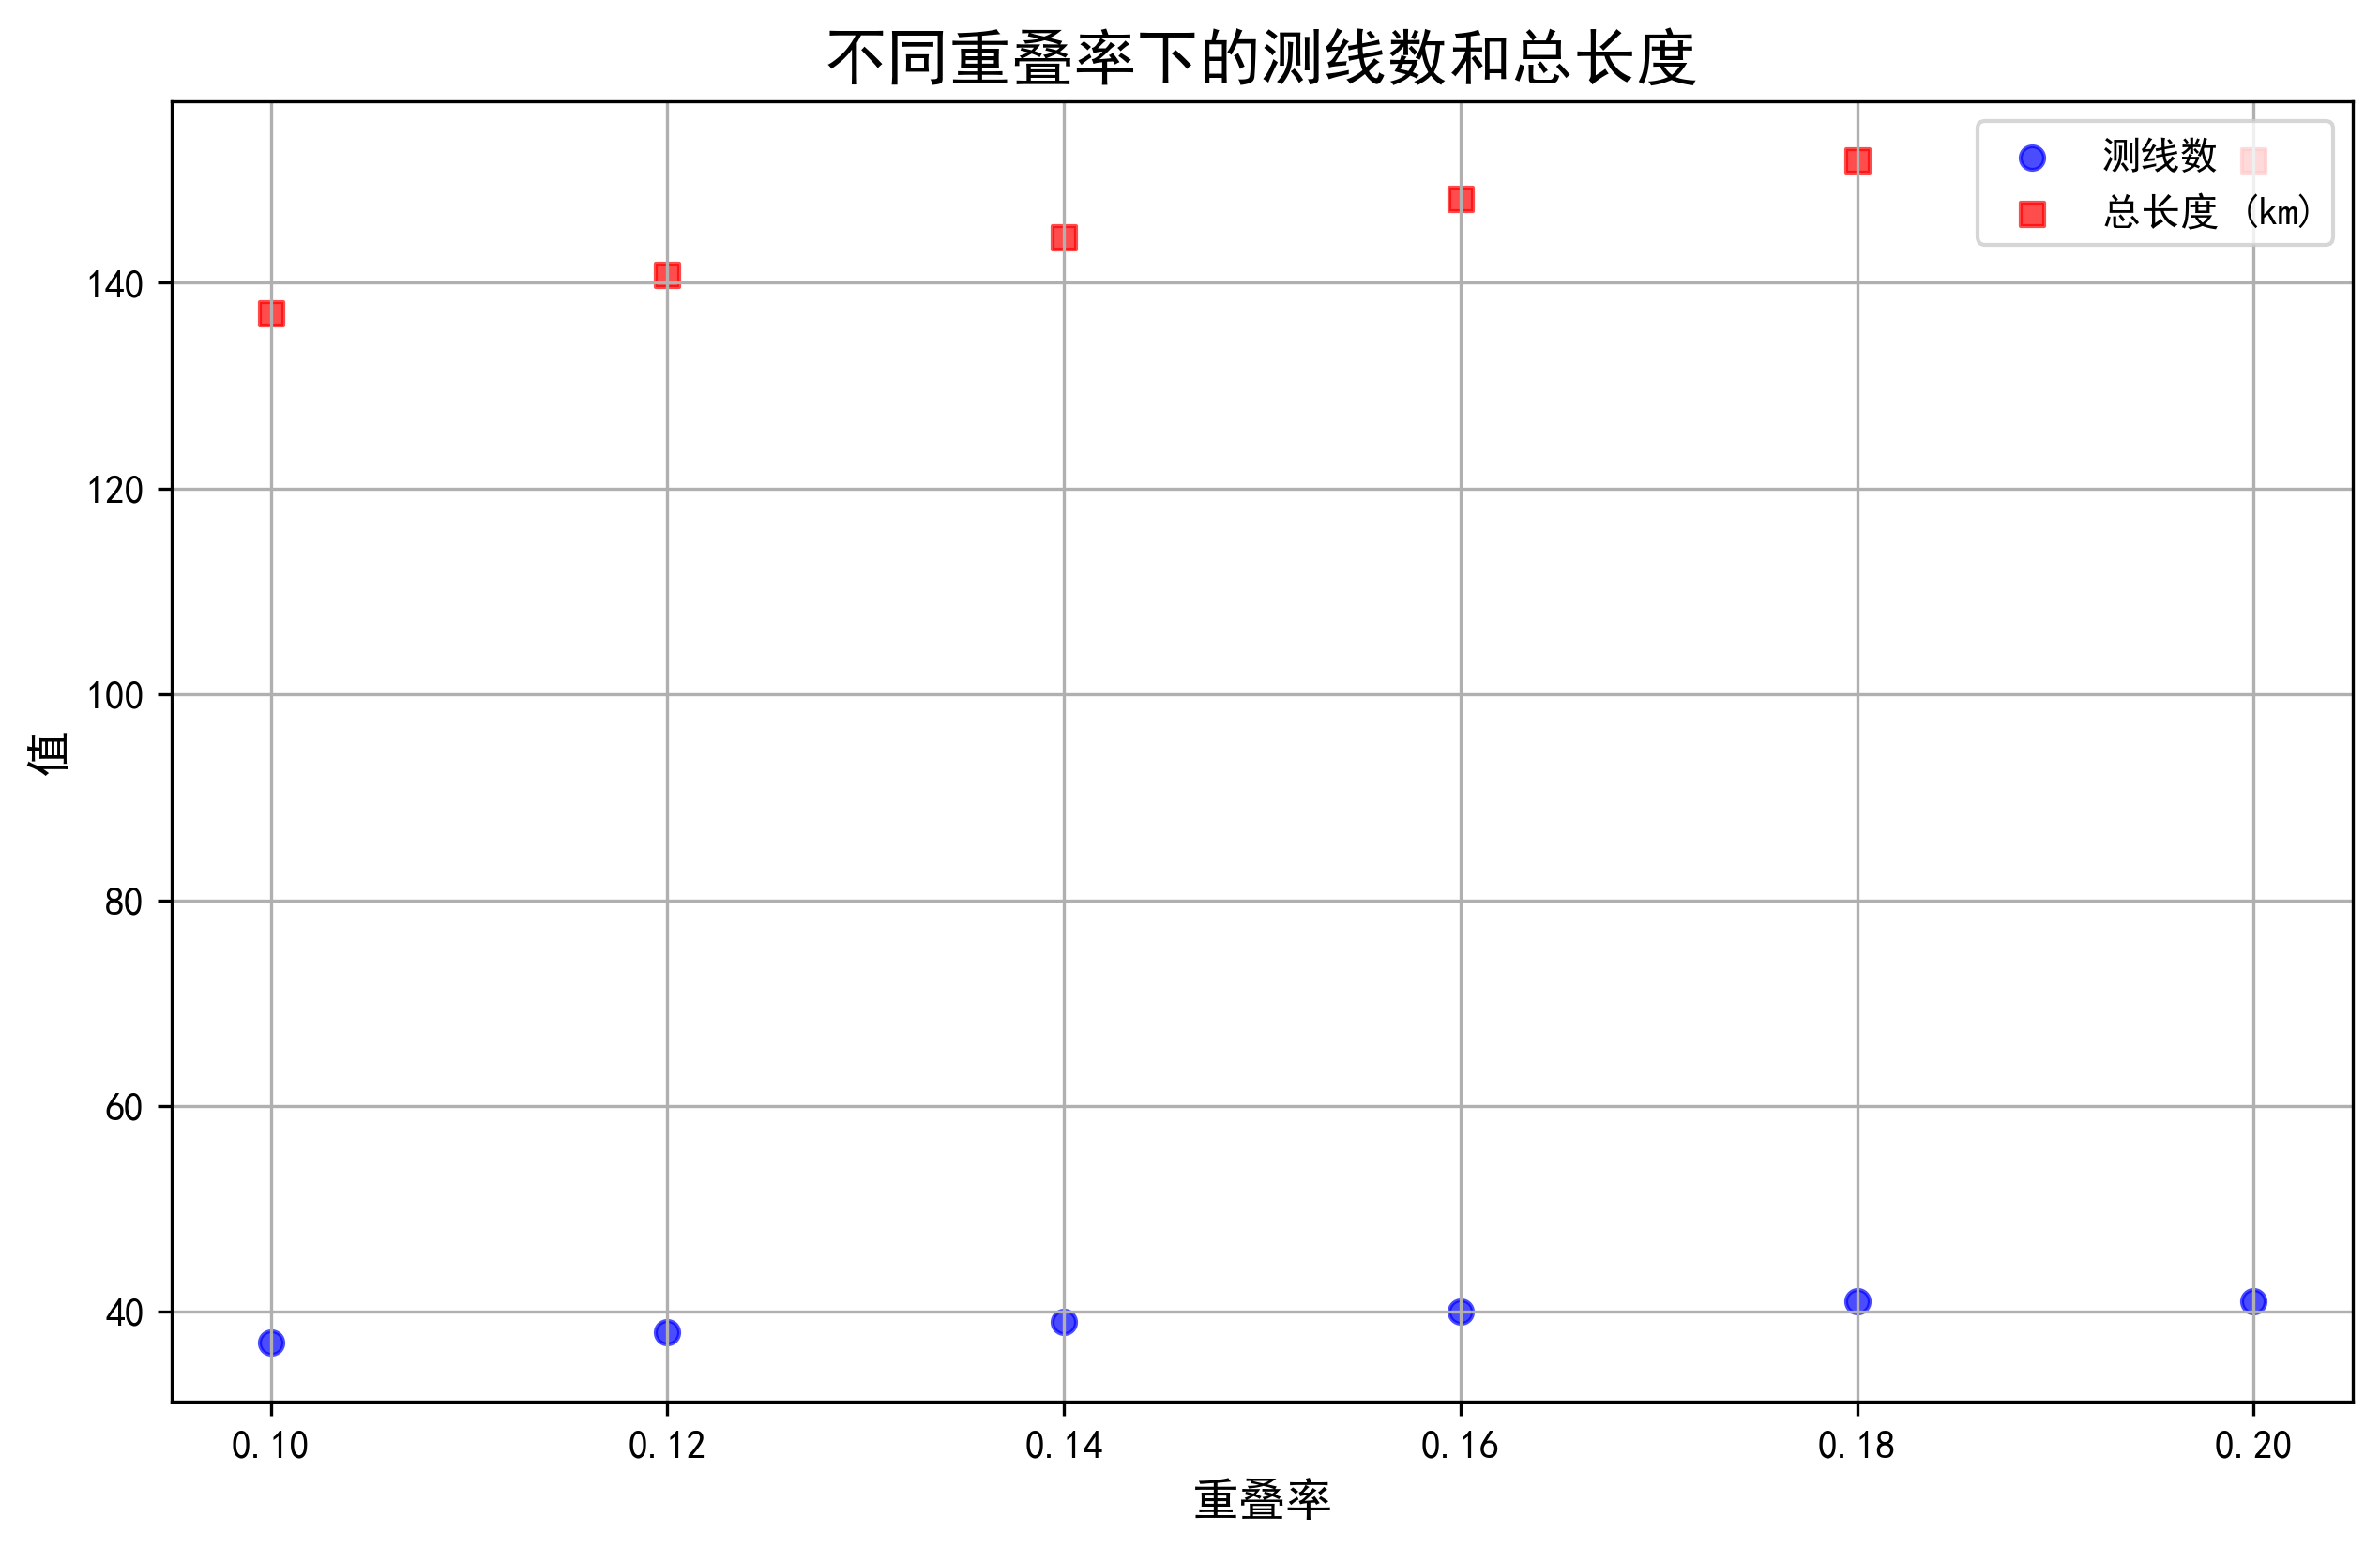

In [4]:
import matplotlib.pyplot as plt

# 将结果数据拆分为不同列表
overlaps, num_lines, total_lengths = zip(*results_with_length)

# 创建一个新的图形
plt.figure(figsize=(10, 6),dpi=300)

# 绘制散点图：测线数 vs. 重叠率
plt.scatter(overlaps, num_lines, label='测线数', marker='o', color='blue', alpha=0.7)

# 绘制散点图：总长度 (km) vs. 重叠率
plt.scatter(overlaps, np.array(total_lengths) / 1000, label='总长度 (km)', marker='s', color='red', alpha=0.7)

# 添加标题和标签
plt.title("不同重叠率下的测线数和总长度", fontsize=16)
plt.xlabel("重叠率", fontsize=12)
plt.ylabel("值", fontsize=12)

# 添加图例
plt.legend(loc='upper right')

# 显示图形
plt.grid(True)
plt.show()
